# Informe análisis exploratorio de datos

En este informe se presenta los insights y una breve descripción de las técnicas utilizadas, en conjunto con gráficos explicativos y pequeños para ser analizados por equipos técnicos en conjunto de una presentación para socializar con equipos no técnicos. Para más detalle revisar el repositorio.

In [32]:
#Librerias necesarias para el analisis de datos
import _warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import friedmanchisquare

import scikit_posthocs as sp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="scikit_posthocs")

In [33]:
#Carga de datos y cálculo de estadísticas descriptivas
new_col_names = ['time', 'Nombre', 'Email', 'Año Egreso', 'Situación Laboral', 'Área de Trabajo Actual', 'Puesto de Trabajo Actual','Desarrollo Profesional' ,'Comunicación Efectiva','Trabajo en Equipo', 'Decisiones Estratégicas', 'Líder Exitoso', 'Cargos de mayor responsabilidad', 'Asignaturas Complementarias Liderazgo','Asignaturas Complementarias Fundamental', 'Comentario', 'Comentario2']
resultados = pd.read_csv('encuesta_exalumnos.csv')
resultados.columns = new_col_names
resultados['Comentario'] = resultados['Comentario'].fillna('') + resultados['Comentario2'].fillna('')
resultados.drop(columns=['Comentario2'], inplace=True)
resultados.describe()

,Desarrollo Profesional,Comunicación Efectiva,Trabajo en Equipo,Decisiones Estratégicas,Líder Exitoso,Cargos de mayor responsabilidad,Asignaturas Complementarias Liderazgo,Asignaturas Complementarias Fundamental
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,8.093750,7.945312,8.140625,7.054688,6.851562,6.945312,6.375000,6.601562
std,1.695002,1.937238,1.872866,2.368788,2.231097,2.266874,2.670928,2.582009
min,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,6.750000,7.000000,6.000000,5.000000,5.000000,5.000000,5.000000
50%,8.000000,8.000000,8.000000,7.500000,7.000000,7.000000,7.000000,7.000000
75%,10.000000,10.000000,10.000000,9.000000,8.000000,9.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [34]:
#Cálculo de Coeficiente de Variación
# Obtener las columnas numéricas
columnas_numericas = resultados.select_dtypes(include='number')

# Calcular el coeficiente de variación para cada columna
coeficientes_variacion = columnas_numericas.std() / columnas_numericas.mean() * 100

# Mostrar los coeficientes de variación
print("Coeficientes de variación (dispersión relativa):")
print(coeficientes_variacion.sort_values(ascending=False))

Coeficientes de variación (dispersión relativa):
Asignaturas Complementarias Liderazgo      41.896915
Asignaturas Complementarias Fundamental    39.112085
Decisiones Estratégicas                    33.577511
Cargos de mayor responsabilidad            32.638907
Líder Exitoso                              32.563328
Comunicación Efectiva                      24.382150
Trabajo en Equipo                          23.006418
Desarrollo Profesional                     20.942109
dtype: float64


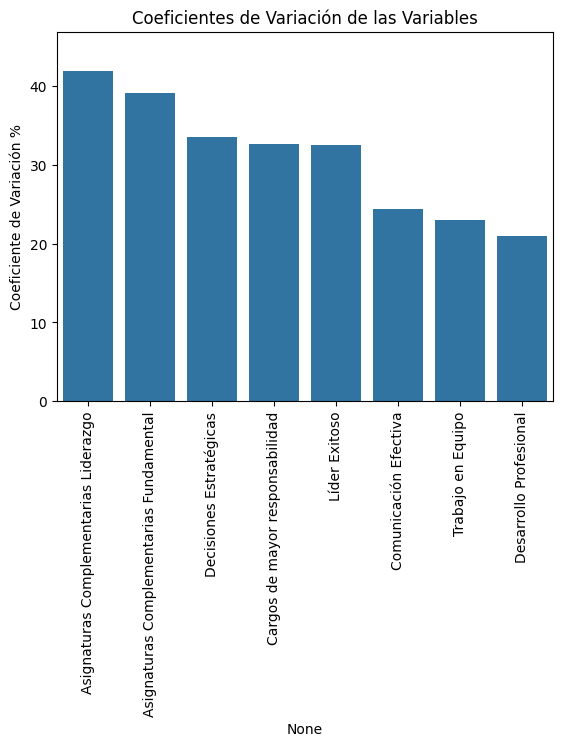

In [35]:
# Gráfica de coeficientes de variaciones
coeficientes_variacion_sorted = coeficientes_variacion.sort_values(ascending=False)
sns.barplot(x=coeficientes_variacion_sorted.index, y=coeficientes_variacion_sorted.values)
plt.ylabel('Coeficiente de Variación %')
plt.title('Coeficientes de Variación de las Variables')
plt.ylim(0, max(coeficientes_variacion_sorted.values) + 5) 
plt.xticks(rotation=90)
plt.show()


Al momento de realizar el análisis se cuenta con un total de 128 respuestas.
Podemos notar que hay variación entre las distintas columnas observando su media y desviación estándar, lo que se traduce en diferentes dispersiones relativas, donde un mayor valor significa mayor dispersión. Algunas columnas alcanzan aproximadamente 40%, que **duplica el valor de la menor dispersión relativa**. 

Esto implica que quienes respondieron la encuesta tienen una **opinión similar** en relación al `Desarrollo Profesional, Trabajo en Equipo y Comunicación Efectiva` pero más **heterogénea** en relación a las `Asignaturas Complementarias de Liderazgo y Fundamentales`, por ejemplo.

Verificaremos si las diferencias son significativas.

In [36]:
#Test de Normalidad a las columnas numéricas
for column in columnas_numericas.columns:
    # Apply Shapiro-Wilk test
    stat, p_value = shapiro(columnas_numericas[column])
    if p_value > 0.05:
        print(f"{column}: normal")
    else:
        print(f"{column}: NO normal")

Desarrollo Profesional: NO normal
Comunicación Efectiva: NO normal
Trabajo en Equipo: NO normal
Decisiones Estratégicas: NO normal
Líder Exitoso: NO normal
Cargos de mayor responsabilidad: NO normal
Asignaturas Complementarias Liderazgo: NO normal
Asignaturas Complementarias Fundamental: NO normal


Al aplicar test de normalidad Shapiro-Wilk se detecta que las respuestas por columna no siguen una distribución normal. Procedemos con test no paramétrico y post hoc en caso de encontrar diferencias

In [37]:
#Test Anova Friedman
# Obtener las columnas numéricas
columnas_numericas = resultados.select_dtypes(include='number')

# Aplicar la prueba de Friedman
statistic, p_value = friedmanchisquare(*columnas_numericas.values.T)

# Imprimir los resultados
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

Estadístico de prueba: 178.49045869384813
Valor p: 4.058580117190066e-35


Como hay diferencias entre algunos grupos, aplicamos Test de Dunn para encontrar estas diferencias

In [38]:
#Aplicación de Test de Dunn. Valores Falsos significa que no hay diferencias significativas.
resultados_melted = pd.melt(columnas_numericas, var_name='Categoria', value_name='Puntuacion')

resultados_melted['Categoria'] = resultados_melted['Categoria'].astype('category')

dunn_result = sp.posthoc_dunn(resultados_melted, val_col='Puntuacion', group_col='Categoria')

dunn_result.apply(lambda x: x < 0.05)

,Asignaturas Complementarias Fundamental,Asignaturas Complementarias Liderazgo,Cargos de mayor responsabilidad,Comunicación Efectiva,Decisiones Estratégicas,Desarrollo Profesional,Líder Exitoso,Trabajo en Equipo
Asignaturas Complementarias Fundamental,False,False,False,True,False,True,False,True
Asignaturas Complementarias Liderazgo,False,False,False,True,True,True,False,True
Cargos de mayor responsabilidad,False,False,False,True,False,True,False,True
Comunicación Efectiva,True,True,True,False,True,False,True,False
Decisiones Estratégicas,False,True,False,True,False,True,False,True
Desarrollo Profesional,True,True,True,False,True,False,True,False
Líder Exitoso,False,False,False,True,False,True,False,True
Trabajo en Equipo,True,True,True,False,True,False,True,False


El test de Dunn muestra las columnas con y sin diferencias significativas en su distribución, sumado a los cálculos de coeficiente de variación podemos definir 3 grupos arbitrarios que comparten estas características, sin diferencias significativas entre sí, pero con diferencias a almenos una columna de los otros grupos.

Grupo 1:`Asignaturas Complementarias Fundamental - Asignaturas Complementarias Liderazgo`

Grupo 2: `Desarrollo Profesional - Comunicación Efectiva - Trabajo en Equipo` 

Grupo 3: `Decisiones Estratégicas - Líder Exitoso - Cargos de mayor responsabilidad` 


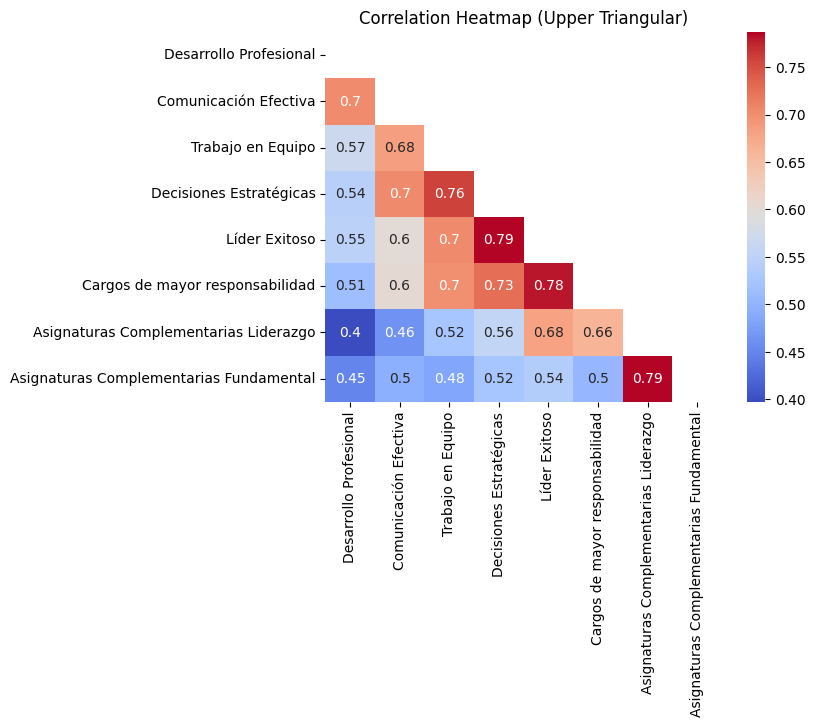

In [39]:
#Cálculo y gráfica de matriz de correlación
corr_matrix = columnas_numericas.corr()

# Create a mask to hide the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.size = (10, 10)
plt.title('Correlation Heatmap (Upper Triangular)')
plt.show()

La matriz muestra mucha correlación positiva entre pares de variables, en particular `Líder Exitoso` con `Decisiones Estretégicas` y `Cargos de Mayor responsabilidad` y también las `Asignaturas Complementarias` entre si.

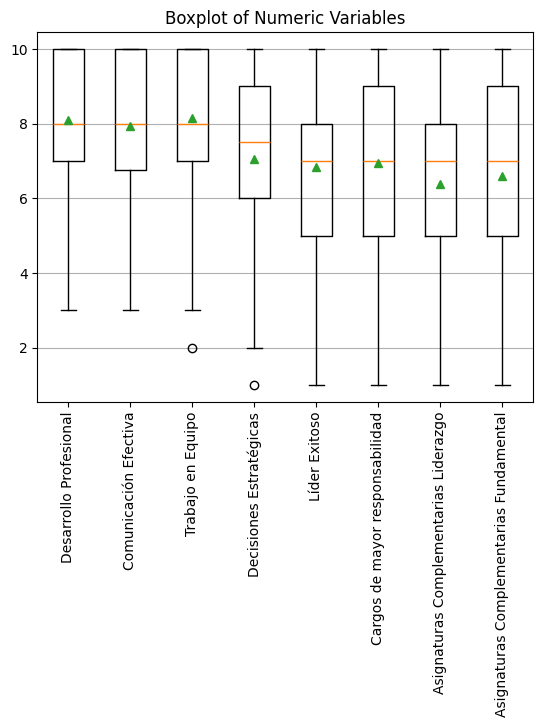

In [40]:
#Boxplot de las columnas numéricas
plt.boxplot(columnas_numericas, showmeans=True,)
plt.title('Boxplot of Numeric Variables')
plt.xticks(range(1, len(corr_matrix.columns) + 1), corr_matrix.columns, rotation=90)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

Considerando que la desviación estándar $s = 0.703$ y $\bar{x} = 7.250$
Al analizar la matriz de correlación, en conjunto con boxplot y el descubrimiento de los 3 grupos concluimos que:
### `Desarrollo Profesional - Comunicación Efectiva - Trabajo en Equipo`
- Son las categorías mejor evaluadas, consistentes entre las respuestas de los encuestados, con aproximadamente un $75\%$ de los encuestados evaluando con una puntuación superior a 7 e incluso, alrededor de un $25\%$ con puntuación de 10.

- Mediante pruebas comprobó por Test de Hipótesis que no hay evidencia para suponer influencia entre encuestados según su respuesta a la pregunta `Puesto Actual` entre quienes contestan y quienes dejan en blanco, que se asume para fines comparativos, no ocupan algún cargo.

- Misma situación ocurre al separar en grupos de `Año de Egreso` desde el 2014 o anteriores, concluyendo que estas variables se han mantenido con fortaleza a lo largo de los distintos cohortes que contestaron.

- Por estos motivos `Desarrollo Profesional - Comunicación Efectiva - Trabajo en Equipo` **son puntos fuertes** evaluadas con promedio $8.09$,  $7.94$ y $8.14$ respectivamente que se deben mantener o mejorar.

### `Decisiones Estratégicas - Líder Exitoso - Cargos de Mayor Responsabilidad`
- Son categorías medianamente bien evaluadas con promedios $7.05$, $6,85$ y $6.94$, con distribuciones similares exceptuando a `Líder Exitoso` que es un poco peor evaluada como se puede apreciar en el boxplot.
- `Lider Exitoso` posee una correlación muy fuerte con `Asignaturas Complementarias Liderazgo`, pero con una media mayor en $0.47$ puntos
- Las 3 categorías presentan una variación dentro del grupo central, es decir, que no son el grupo con el mayor ni el menor coeficiente de variación.
- Las 3 categorías se relacionan semánticamente con la habilidad de **Toma de Decisiones**. Al existir una evaluación media en estas categorías con variadas apreciaciones. Suponemos que la carrera no entregó eficazmente las herramientas para desarrollar esta habilidad que se ve reflejada en la evaluación de estas 3 categorías.
- 

### `Asignaturas Complementarias Fundamental - Asignaturas Complementarias Liderazgo`
- Son las categorías peor evaluadas con promedios de $6.60$ y $6.37$ y cuyas distribuciones presentan la mayor dispersión, absoluta y relativa.
- Al existir tanta variedad en la respuesta que no responde a algúna otra variables explicativa dentro de las variables categóricas probadas mediante Test de Hipótesis, creemos que las asignaturas complementarias no están siendo eficaces en el desarrollo de estas competencias.
- Al existir una alta correlación ($0.79$) entre quienes contestan la encuesta para estas dos categorías, sumado a la alta varicaión de sus coeficientes de relación podemos plantear que quienes responden la encuesta han aprovechado de distinta manera las oportunidades de las Asignaturas Complementarias. Esta afirmación es sostenida por la consistencia en las otras columnas de lo anteriormente mencionado.

Lo sostenido en este apartado se puede apreciar mejor cuando analizamos las variables escaladas con logaritmo escalar y reducir el peso de las puntuaciones muy altas, que son la gran mayoría ($>78 \%$)

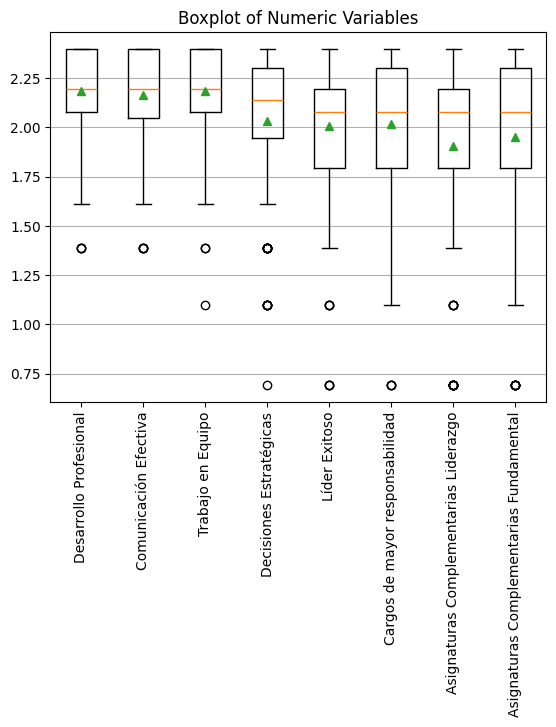

In [41]:
#Boxplot de las columnas numéricas con escala logarítmica neperiana
numeric_columns_log = columnas_numericas.copy()
numeric_columns_log = np.log1p(numeric_columns_log)
plt.boxplot(numeric_columns_log, showmeans=True,)
plt.title('Boxplot of Numeric Variables')
plt.xticks(range(1, len(corr_matrix.columns) + 1), corr_matrix.columns, rotation=90)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

Es interesante analizar el caso de `Asignaturas Complementarias Liderazgo` ya que su comportamiento es una mezcla entre `Líder Exitoso` y `Asignaturas Complementarias Fundamental`, que puede ser observado en se los pares con la mayor correlación ($0.79$) entre todas las variables.

Al escalar logaritmicamente obtenemos una cantidad de outliers ya que indirectamente estamos disminuyendo el valor del rango intercuartilm lo que hace a las distribuciones "más cortas" en la parte de los valore superiores. Analizaremos en detalle esta categoría pues parece interesante ya que puede ser una variable sobre la cual trabajar mejoras de forma trasnversal.



Puesto de Trabajo Actual Code
ingeniero    27
gerente      16
otros        15
jefe         10
Name: count, dtype: int64


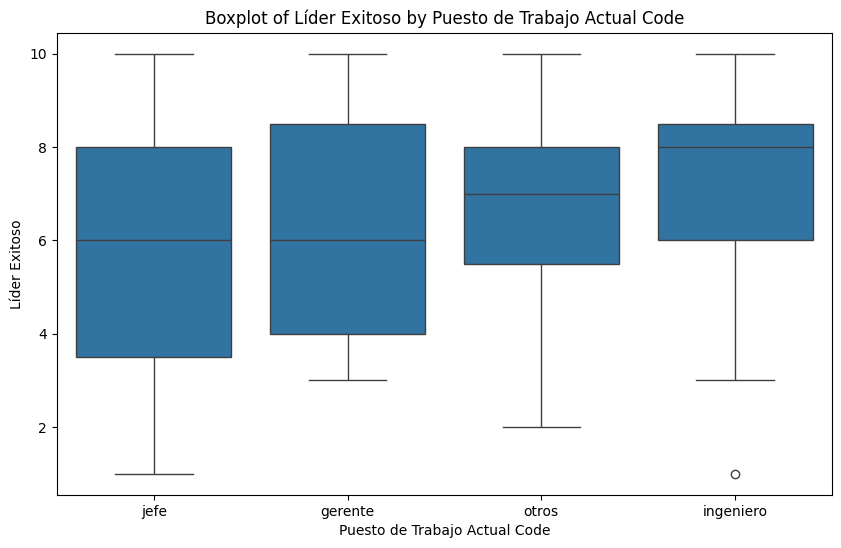

In [42]:
#Lider Exitoso separado por puesto actual de trabajo
resultados['Puesto de Trabajo Actual Code'] = resultados['Puesto de Trabajo Actual']
for puesto in resultados['Puesto de Trabajo Actual'].astype(str):
    if 'jefe' in puesto.lower():
        puesto_cod = 'jefe'
    elif 'gerente' in puesto.lower() or 'manager' in puesto.lower():
        puesto_cod = 'gerente'
    elif 'ingeniero' in puesto.lower() or 'ing' in puesto.lower() or 'engi' in puesto.lower():
        puesto_cod = 'ingeniero'
    elif puesto:
        puesto_cod = 'otros'
    resultados['Puesto de Trabajo Actual Code'] = resultados['Puesto de Trabajo Actual Code'].replace(puesto, puesto_cod)
        
print(resultados['Puesto de Trabajo Actual Code'].value_counts())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Puesto de Trabajo Actual Code', y='Líder Exitoso', data=resultados)
plt.title('Boxplot of Líder Exitoso by Puesto de Trabajo Actual Code')
plt.xlabel('Puesto de Trabajo Actual Code')
plt.ylabel('Líder Exitoso')
plt.show()

Vemos que quienes tienen una **apreciación positiva** del Liderazgo son aquellos que declaran ocupar un puesto activo de **Ingeniero**, en contraparte, quienes presentan la **peor evaluación** son quienes declaran ocupar un cargo de **Jefe**. 

Si bien no se desprende de los datos, podemos suponer que la exigencia de liderazgo en cargos de **Jefe** es mayor y que las competencias desarrolladas pueden no ser suficientes.

Esto da pie a saber de alguna manera como se comportan las otras categorías, a continuación presentamos los promedios agrupados por columna según los puestos agrupados.

In [43]:
#Promedio por categoría de puestos agrupados para cada columna + promedio y desviacion de las columnas
promedio_por_puesto = columnas_numericas.groupby(resultados['Puesto de Trabajo Actual Code']).mean()
promedio_por_puesto['Promedio'] = promedio_por_puesto.mean(axis=1)
promedio_por_puesto['Desviación Estándar'] = promedio_por_puesto.std(axis=1)
promedio_por_puesto['Coeficiente de Variación'] = promedio_por_puesto['Desviación Estándar'] / promedio_por_puesto['Promedio'] * 100
promedio_por_puesto[['Promedio', 'Desviación Estándar', 'Coeficiente de Variación']]


,Promedio,Desviación Estándar,Coeficiente de Variación
Puesto de Trabajo Actual Code,,,
gerente,7.046875,0.831362,11.797593
ingeniero,7.416667,0.776399,10.468297
jefe,6.537500,0.751561,11.496151
otros,6.725000,0.689152,10.247614


Como los datos tienen una dispersión relativa similar y medias similares, podemos suponer que son comparables inicialmente sin ajustes. Para el análisis que realizaremos no será necesario verificar esta hipótesis.

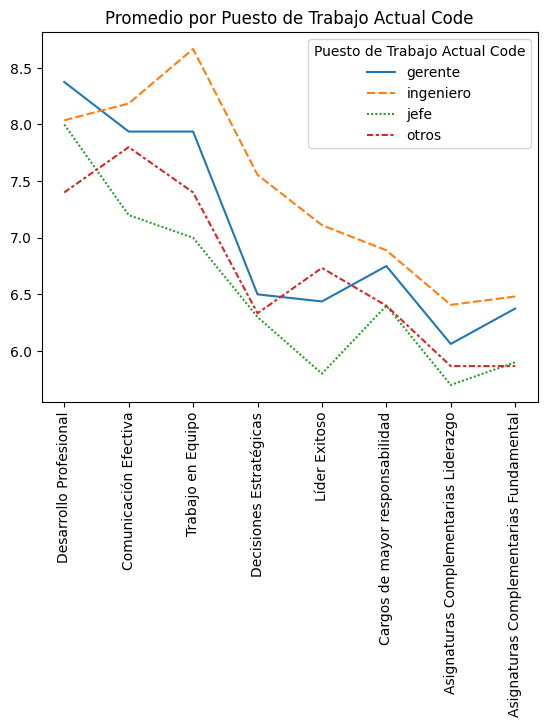

In [44]:
#Gráfica de promedio por categoría de puestos agrupados para cada columna
promedio_por_puesto.drop(columns=['Promedio', 'Desviación Estándar', 'Coeficiente de Variación'], inplace=True)
sns.lineplot(promedio_por_puesto.transpose())
plt.xticks(rotation=90)
plt.title('Promedio por Puesto de Trabajo Actual Code')
plt.show()

En general, quienes ocupan cargos agrupados de ingeniero tienden a tener apreciaciones mejores de las preguntas realizadas en la encuesta, mientras que jefe responde con las peores puntuaciones. 
 
Como se mencionó anteriormente, puede ser por las exigencias del cargo o las competencias desarrolladas de forma menor a lo necesitado lo que motive esto.

# Conclusiones del análisis exploratorio

En esta primera parte y antes de continuar con el análisis cualitativo de las respuestas de comentarios necesitamos establecer lo siguiente.

1. Los comentarios y calificaciones aportadas por quienes declaran ser **Jefe** mostrarán mayor inquietud y probablemente sus críticas reflejen las necesidades que enfrentan o enfrentaron al ocupar ese cargo y que declaran que la formación inicial debe hacerse responsable.

2. El `Liderazgo` es un punto crítico que debe ser mejorado prioritariamente en la formación inicial.

3. Las `Asignaturas Complementarias` son mejorables, pero la baja puntuación parece no ser solo debido a una baja calidad en las asignaturas, más bien la forma en que distintos estudiantes las abordan. Es un punto que sería interesante abordar en un siguiente análisis para detectar claramente que está fallanado y cuales son las oportunidades de mejora.

4. `Desarrollo Profesional, Comunicación Efectiva y Trabajo en Equipo` son puntos fuertes que deben ser los pilares para encontrar oportunidades de mejora en las otras áreas.

5. Al separar al grupo en dos categorías por `Año de Egreso` las puntuaciones se mantienen estables. Puede analizarse con mayor detalles en el anexo acontinuación.

## Anexo 
División del grupo en años a partir del 2014 para analizar las puntuaciones. Se calcula la homogeneidad de las muestras mediante el test de Mann-Whitney U

In [45]:
#Cálculo homogeneidad de las medias de las columnas numéricas para los años de egreso 2014 en adelante y antes de 2014
# Corregir el valor 19999 a 1999
resultados.loc[resultados['Año Egreso'] == '19999', 'Año Egreso'] = '1999'
resultados_numericos_por_año = pd.concat([resultados['Año Egreso'], columnas_numericas], axis=1)
# Calcular el promedio de los datos numéricos para cada Año de Egreso
promedio_por_año = resultados_numericos_por_año.groupby('Año Egreso').mean()
resultados_numericos_por_año.dropna(inplace=True)
resultados_numericos_por_año['Año Egreso'] = resultados_numericos_por_año['Año Egreso'].str.replace('2005 (Ejecución), 2013 (Civil)', '2013')
resultados_numericos_posterior_2014 = resultados_numericos_por_año[resultados_numericos_por_año['Año Egreso'].astype(int) >= 2014]
resultados_numericos_anterior_2014 = resultados_numericos_por_año[resultados_numericos_por_año['Año Egreso'].astype(int) < 2014]

#Prueba de homogeneidad para datos no normales Mann-Whitney U
from scipy.stats import mannwhitneyu
for col in columnas_numericas.columns:
    u_stat, p_value = mannwhitneyu(resultados_numericos_posterior_2014[col], resultados_numericos_anterior_2014[col])
    print(f'{col}: {u_stat}, valor_ p = {p_value}')


Desarrollo Profesional: 1605.0, valor_ p = 0.7661066472071304
Comunicación Efectiva: 1643.0, valor_ p = 0.936716952693851
Trabajo en Equipo: 1749.0, valor_ p = 0.604150816463803
Decisiones Estratégicas: 1894.0, valor_ p = 0.18444086004539306
Líder Exitoso: 1495.5, valor_ p = 0.3616349604987935
Cargos de mayor responsabilidad: 1670.5, valor_ p = 0.9440158691893763
Asignaturas Complementarias Liderazgo: 1575.0, valor_ p = 0.6456992566026918
Asignaturas Complementarias Fundamental: 1651.0, valor_ p = 0.973168511433082


Los valores p altos indican que no hay evidencia significativa para suponer que las muestras son distintas, por lo tanto aceptamos la homogeneidad entre los grupos anteriores al 2014 y posteriores

A continuación se presentan las gráficas de frecuencias con su respectiva media para las preguntas con valores numéricos

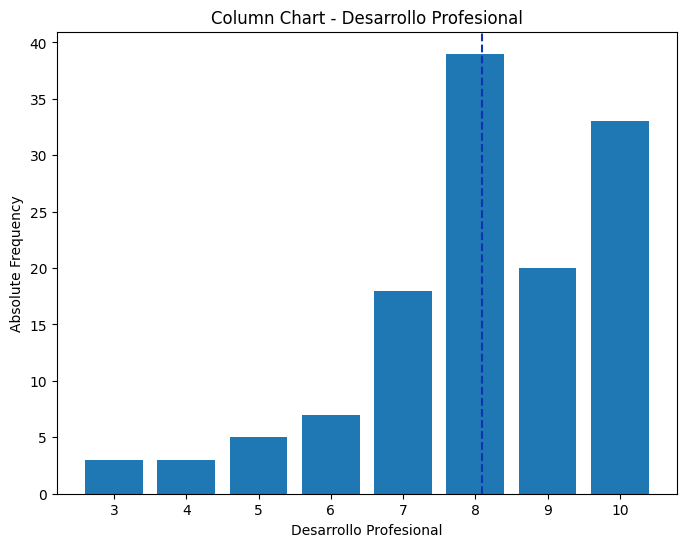

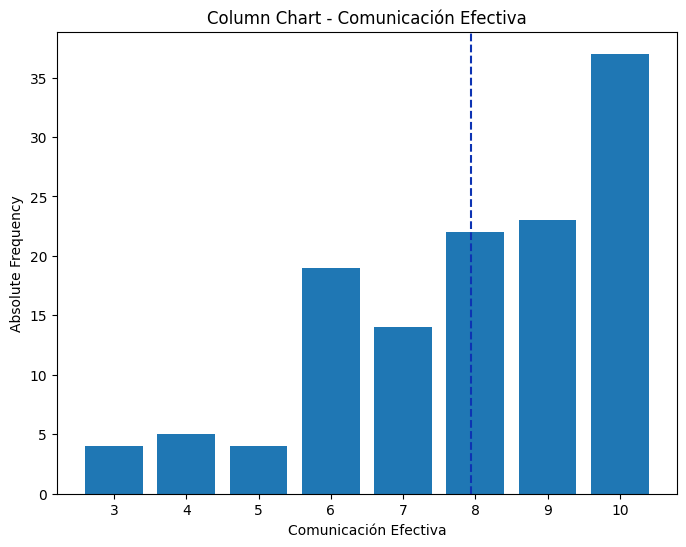

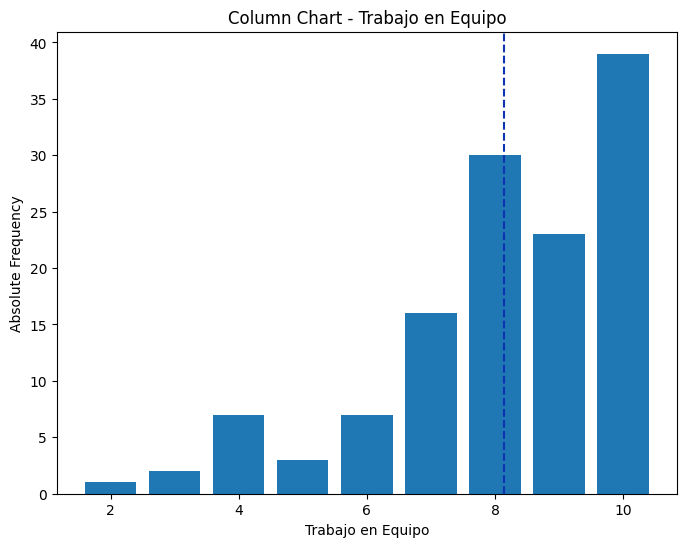

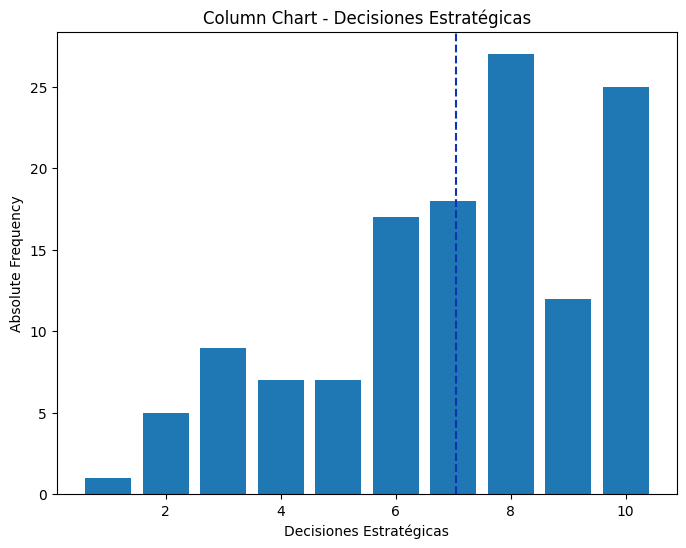

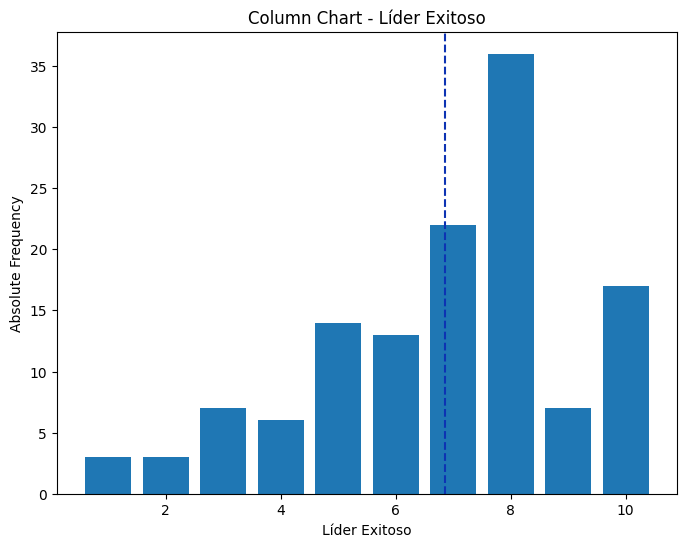

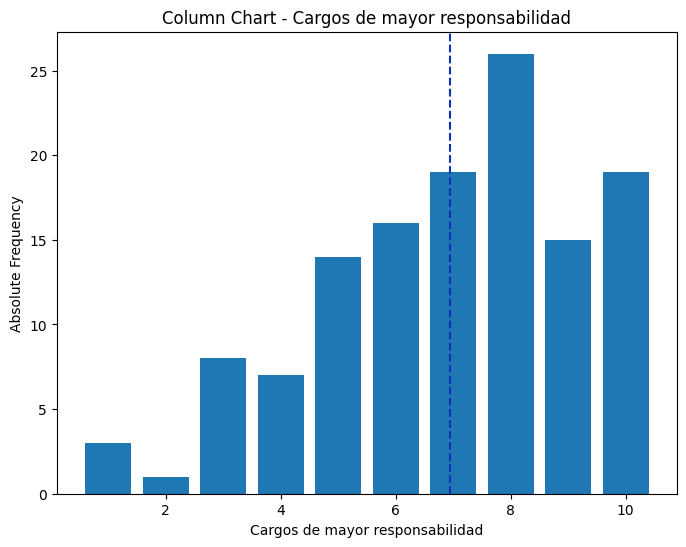

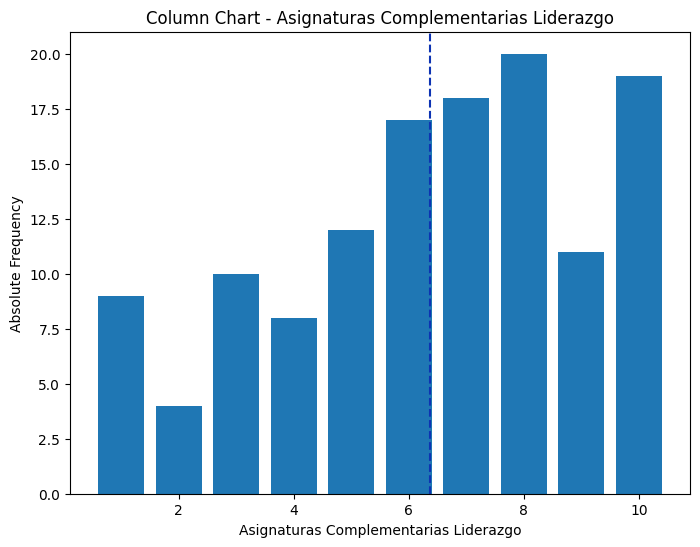

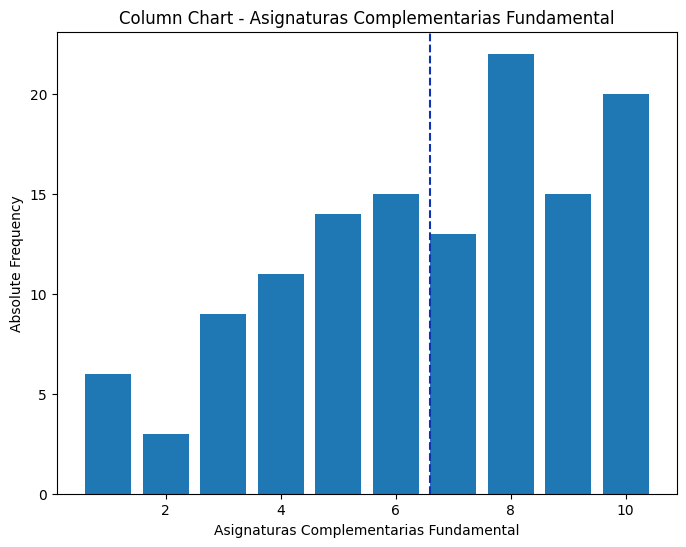

In [46]:
#Gráficas de frecuencia de respuestas numéricas
import matplotlib.pyplot as plt

# Calculate the total count of data points
total_count = len(columnas_numericas)

# Iterate over each column
for column in columnas_numericas.columns:
    # Calculate the absolute frequency
    absolute_frequency = columnas_numericas[column].value_counts().sort_index()
    
    # Calculate the relative frequency
    relative_frequency = absolute_frequency / total_count * 100
    
    # Create the column chart
    plt.figure(figsize=(8, 6))
    plt.bar(absolute_frequency.index, absolute_frequency.values)
    # Calculate the mean
    mean_value = columnas_numericas[column].mean()

    # Add a vertical red line for the mean
    plt.axvline(x=mean_value, color='#0D33B3', linestyle='--')
    # Set the title and labels
    plt.title(f'Column Chart - {column}')
    plt.xlabel(column)
    plt.ylabel('Absolute Frequency')
    
    # Show the plot
    plt.show()